# Insurance: Predicting claims (charges)
*Created by: 
Anna Sukhareva, data scientist  
Antwerpen, Belgium  
Date: October 13, 2019  
Contacts: anna@linefeed.be*
 ***

## Table of Contents
Stage 1 : Business Understanding  
Stage 2 : Analytic Approach  
Stage 3 : Data Requirements  
Stage 4 : Data Collection  
Stage 5 : Data Understanding  
Stage 6 : Data Preparation  
Stage 7 : Modeling  
Stage 8 : Evaluation  
Sample of use  
***


### Stage 1 : Business Understanding
**Problem:**   
The insurance companies are extremely interested in the prediction of the future. Accurate prediction gives a chance to reduce financial loss for the company. Forecasting the upcoming claims helps to charge competitive premiums that are not too high and not too low. It also contributes to the improvement of the pricing models. This helps the insurance company to be one step ahead of its competitors.

**Question:**  
Can we predict a potential customer's charges?

### Stage 2 : Analytic Approach  
A linear regression model with multiple variables will be built.

### Stage 3 : Data Requirements  
**Data content:** To answer the question we need data about current customers, that have next features about each customer: age, sex, bmi, number of children, smorer, region, sum of charges last year, if customer was a claimer last year or no.  
**Data formats:** CSV format  
**Data sources:** corporative information from the insured company.

### Stage 4 :  Data Collection
Data was collected from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset)


In [14]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#machine learnong
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [15]:
#reading the file
df = pd.read_csv('insurance3r2.csv')

#from Kaggle we read like following: df = pd.read_csv('//kaggle/input/sample-insurance-claim-prediction-dataset/insurance3r2.csv')

### Stage 5 : Data Understanding  
##### Descriptive statistics:

In [5]:
print(df.shape)
print(df.columns)
print(df.describe())

(1338, 9)
Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')
               age          sex          bmi         steps     children  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397   5328.623318     1.094918   
std      14.049960     0.500160     6.098187   2453.643236     1.205493   
min      18.000000     0.000000    15.960000   3000.000000     0.000000   
25%      27.000000     0.000000    26.296250   3008.000000     0.000000   
50%      39.000000     1.000000    30.400000   4007.000000     1.000000   
75%      51.000000     1.000000    34.693750   8004.000000     2.000000   
max      64.000000     1.000000    53.130000  10010.000000     5.000000   

            smoker       region       charges  insuranceclaim  
count  1338.000000  1338.000000   1338.000000     1338.000000  
mean      0.204783     1.515695  13270.422265        0.585

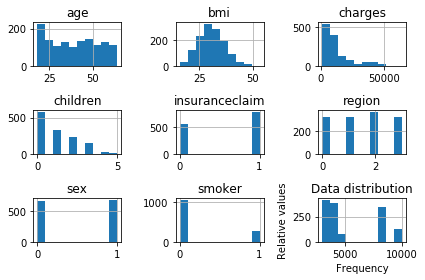

In [6]:
df.hist()
plt.title('Data distribution')
plt.xlabel('Frequency')
plt.ylabel('Relative values')
plt.tight_layout()
plt.show()

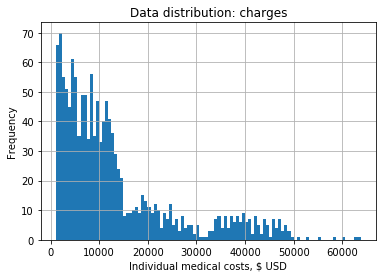

(7, 9)


In [5]:
df.hist(column='charges', bins=100)
plt.title('Data distribution: charges')
plt.xlabel('Individual medical costs, $ USD')
plt.ylabel('Frequency')
plt.show()
charges_outliers = df.loc[df.charges >= 50000]
print(charges_outliers.shape) 

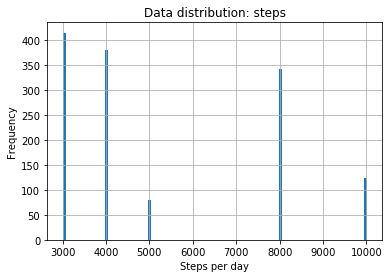

In [7]:
df.hist(column='steps', bins=100)
plt.title('Data distribution: steps')
plt.xlabel('Steps per day')
plt.ylabel('Frequency')
plt.show()

Let's round groups to 3000, 4000, 5000, 8000, 10000 for a nicer overview:

In [8]:
decimals = -3
df['steps']=df['steps'].apply(lambda x: round(x, decimals))
print(df.steps.value_counts())

3000     414
4000     380
8000     342
10000    123
5000      79
Name: steps, dtype: int64


##### Correlation discovering:

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


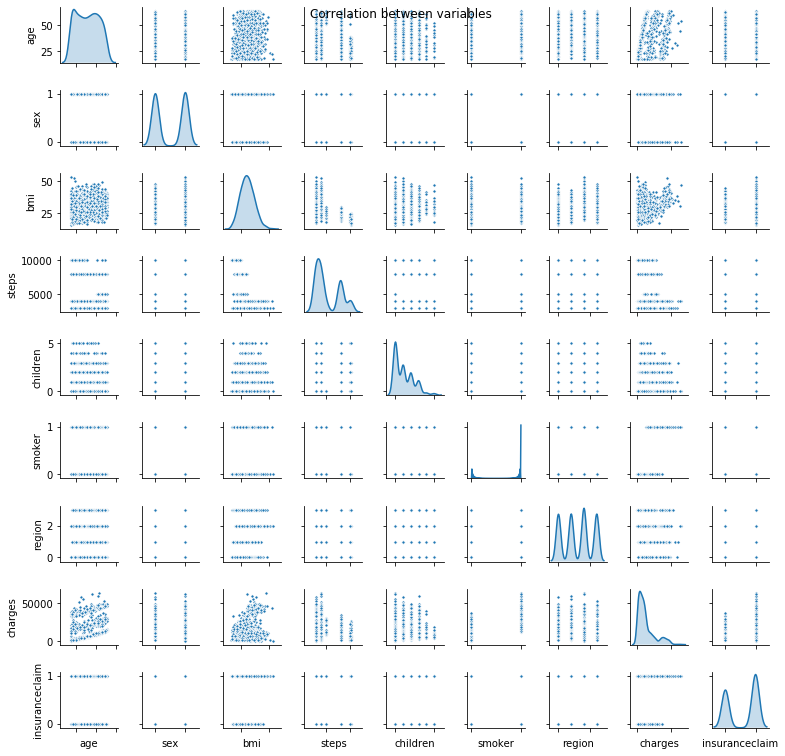

In [16]:
pp = sns.pairplot(df, palette = 'deep', height=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])
plt.suptitle('Correlation between variables')
plt.show()

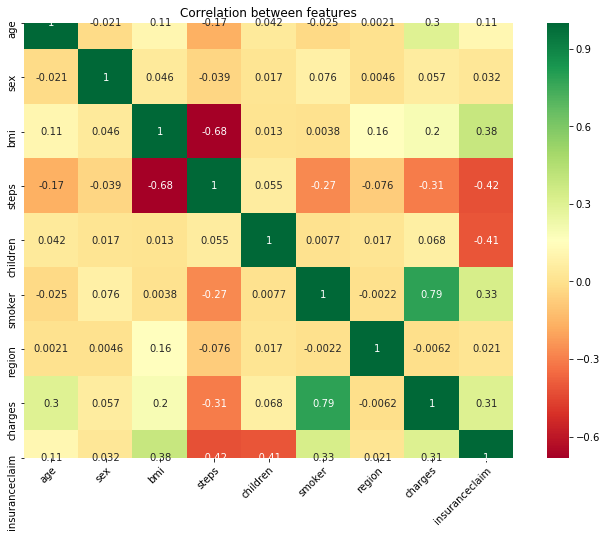

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', annot=True, mask=None)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.title('Correlation between features')
plt.show()

### Stage 6 : Data Preparation  
##### Dealing with missing data and outliers:

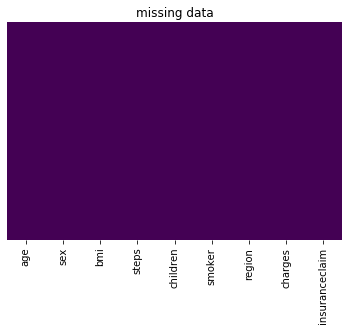

In [18]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('missing data')
plt.show()

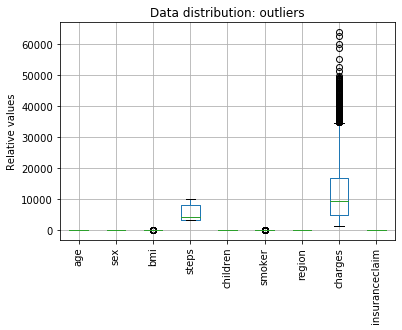

In [19]:
df.boxplot()
plt.title('Data distribution: outliers')
plt.ylabel('Relative values')
plt.xticks(rotation='vertical')
plt.show()

### Stage 7 : Modeling 
We're building a predictive regression model with next different classifiers:
- Linear regression,
- Ridge,
- Lasso,
-RandomForestRegressor.

The best model will be chosen based on accuracy score R2 and RMSE.

Linear Regression R^2: 0.7739
Ridge Regression R^2: 0.7192
Lasso Regression R^2: 0.7741
Random Forest R^2: 0.8468
Linear Regression RMSE: 5757.62
Ridge Regression RMSE: 6416.32
Lasso Regression RMSE: 5755.3
Random Forest RMSE: 4785.63
               Model     R^2     RMSE
0  Linear Regression  0.7739  5757.62
1   Ridge Regression  0.7192  6416.32
2   Lasso Regression  0.7741  5755.30
3      Random Forest  0.8468  4785.63


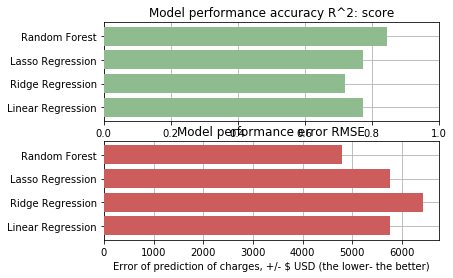

In [19]:
X = df.drop(['insuranceclaim', 'charges'] , axis=1).values
y = df['charges'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))


LinearRegression = LinearRegression()
Ridge = Ridge(alpha = 0.3, normalize=True)
Lasso = Lasso(alpha=0.6, normalize=True)
RandomForest = RandomForestRegressor(n_estimators=100)

def calculate_R2(model, model_name):
    model.fit(X_train, y_train)
    y_pred =  model.predict(X_test)
    R2 = model.score(X_test, y_test).round(4)
    print(model_name, 'R^2: {}' .format(R2))
    return R2

LinearRegression_R2 = calculate_R2(LinearRegression, 'Linear Regression')
Ridge_R2 = calculate_R2(Ridge, 'Ridge Regression')
Lasso_R2 = calculate_R2(Lasso, 'Lasso Regression')
RandomForest_R2 = calculate_R2(RandomForest, 'Random Forest')

 
def calculate_RMSE(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    print(model_name, "RMSE: {}".format(RMSE))
    return RMSE
   
LinearRegression_RMSE = calculate_RMSE(LinearRegression, 'Linear Regression')
Ridge_RMSE = calculate_RMSE(Ridge, 'Ridge Regression')
Lasso_RMSE = calculate_RMSE(Lasso, 'Lasso Regression')
RandomForest_RMSE = calculate_RMSE(RandomForest, 'Random Forest')
df_R2_RMSE = pd.DataFrame(
    {
        'Model':['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest'], 
        'R^2':[LinearRegression_R2, Ridge_R2, Lasso_R2, RandomForest_R2], 
        'RMSE':[LinearRegression_RMSE, Ridge_RMSE, Lasso_RMSE,RandomForest_RMSE]
    }
)
print(df_R2_RMSE)
# #result visualization
x = range(df_R2_RMSE.shape[0])
plt.subplot(2,1,1)
R2 = plt.barh(x, df_R2_RMSE['R^2'], color=('darkseagreen'), zorder=3)
plt.xlabel('Score, 1 = 100% (the higher - the better)')
plt.yticks(x, df_R2_RMSE['Model'])
plt.title('Model performance accuracy R^2: score')
plt.grid(zorder=0)
plt.xlim(0, 1)
plt.subplot(2,1,2)
RMSE =plt.barh(x, df_R2_RMSE['RMSE'], color=('indianred'), zorder=3)
plt.xlabel('Error of prediction of charges, +/- $ USD (the lower- the better)')
plt.yticks(x, df_R2_RMSE['Model'])
plt.title('Model performance error RMSE')
plt.grid(zorder=0)
plt.show()

Best performance - Random Forest classifier, with accuracy score R^2 = 85,4%, RMSE: +/- 4587 USD

**Result: We built a model with Random Forest classifier, accuracy score R^2 = 85,4%, RMSE: +/- 4587 USD.**

### Stage 8 : Evaluation
As the model has accuracy score 85.4%.

### Sample of use:   

2 potential customers: 
1. Ben: age 19, male, bmi 27.9, steps 3000 per day, no children, smoker, North-West,
2. Jerry: age 23, male, bmi 24.3, steps 6000 per day, no children, non-smoker, North-West.

To predict the sum of charges:

In [20]:
Ben_Jerry_test_charges = [[1, 0, 27.900, 3000, 0, 1, 3], [1, 0, 24.3, 6000, 0, 0, 3]]
df_Ben_Jerry_charges = pd.DataFrame(Ben_Jerry_test_charges)
clf = RandomForest
clf.fit(X_train, y_train)
prediction_chages = clf.predict(df_Ben_Jerry_charges)
print('Prediction {}'.format(prediction_chages))

Prediction [17409.5635691  2772.7553145]


**Result:** 
- Ben's predicted charges are 17 151 USD, 
- Jerry's predicted charges are 2 572 USD,     
With error +/- 4587 USD and accuracy score of the model 85.4%.